<a href="https://colab.research.google.com/github/Gayathri288/231801039_PODS/blob/main/ex_6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

print(df.head())
print("\nShape:", df.shape)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Shape: (144, 1)


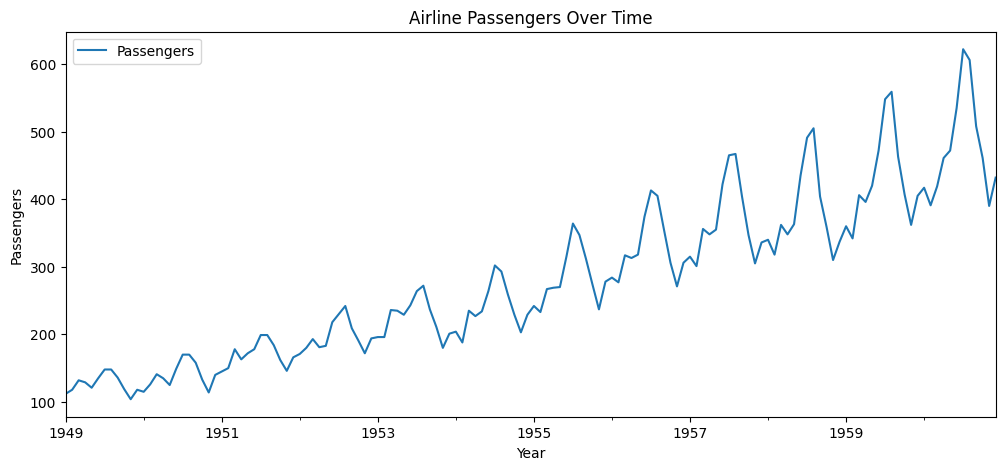

In [3]:
df.plot(figsize=(12,5))
plt.title("Airline Passengers Over Time")
plt.ylabel("Passengers")
plt.xlabel("Year")
plt.show()


In [5]:
def adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observations']
    for value,label in zip(result,labels):
        print(f"{label} : {value}")
    if result[1] <= 0.05:
        print(" Stationary (reject H0)")
    else:
        print(" Non-Stationary (fail to reject H0)")

print("\nADF Test on Original Series:")
adf_test(df['Passengers'])


ADF Test on Original Series:
ADF Test Statistic : 0.8153688792060498
p-value : 0.991880243437641
#Lags Used : 13
#Observations : 130
 Non-Stationary (fail to reject H0)


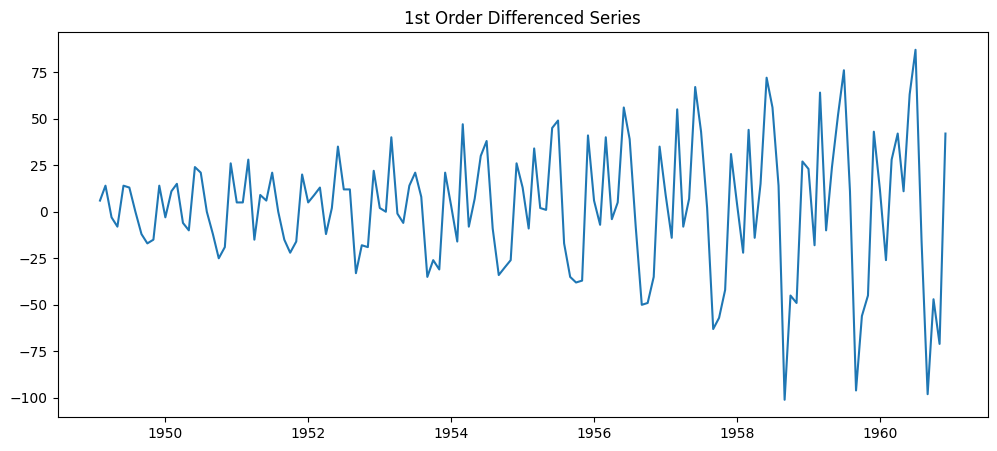


ADF Test on Differenced Series (d=1):
ADF Test Statistic : -2.8292668241700047
p-value : 0.05421329028382478
#Lags Used : 12
#Observations : 130
 Non-Stationary (fail to reject H0)


In [6]:
df['Passengers_diff1'] = df['Passengers'].diff()

plt.figure(figsize=(12,5))
plt.plot(df['Passengers_diff1'])
plt.title("1st Order Differenced Series")
plt.show()

print("\nADF Test on Differenced Series (d=1):")
adf_test(df['Passengers_diff1'])

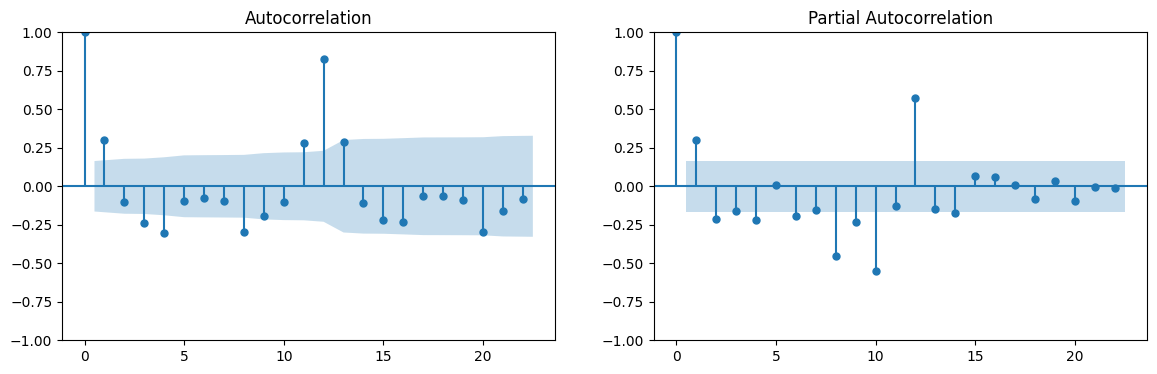

In [7]:
fig, axes = plt.subplots(1,2, figsize=(14,4))
plot_acf(df['Passengers_diff1'].dropna(), ax=axes[0])
plot_pacf(df['Passengers_diff1'].dropna(), ax=axes[1])
plt.show()


In [8]:
train_size = int(len(df) * 0.8)
train, test = df['Passengers'][:train_size], df['Passengers'][train_size:]

print("Train size:", len(train), "Test size:", len(test))


Train size: 115 Test size: 29


In [9]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -523.758
Date:                Tue, 16 Sep 2025   AIC                           1057.516
Time:                        10:30:48   BIC                           1071.197
Sample:                    01-01-1949   HQIC                          1063.069
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3280      0.145      2.268      0.023       0.045       0.611
ar.L2          0.2521      0.165      1.528      0.126      -0.071       0.575
ma.L1         -0.0125      0.109     -0.114      0.9

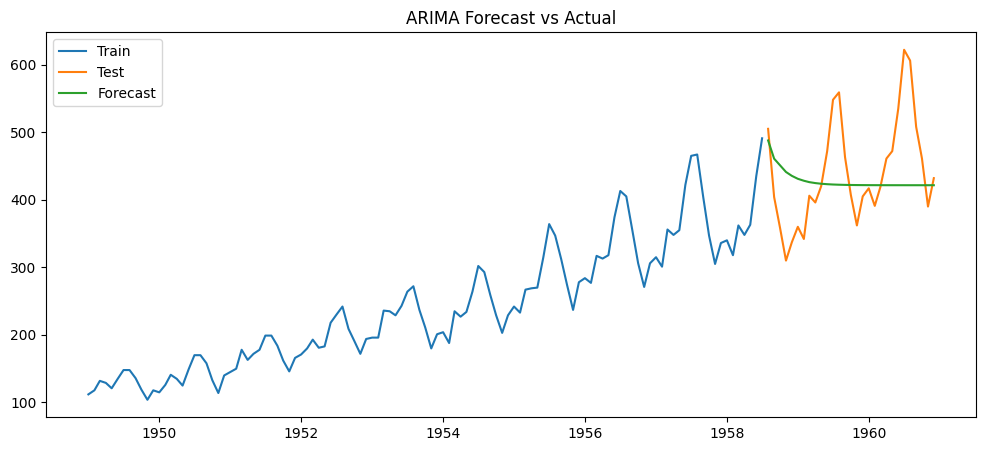

In [10]:
forecast = model_fit.forecast(steps=len(test))
test_index = test.index

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test_index, forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [11]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = math.sqrt(mse)

print("\nEvaluation Metrics:")
print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)



Evaluation Metrics:
MSE : 6808.397034418323
MAE : 63.54531127532635
RMSE: 82.51301130378361


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/tmp/ipython-input-3300186629.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[

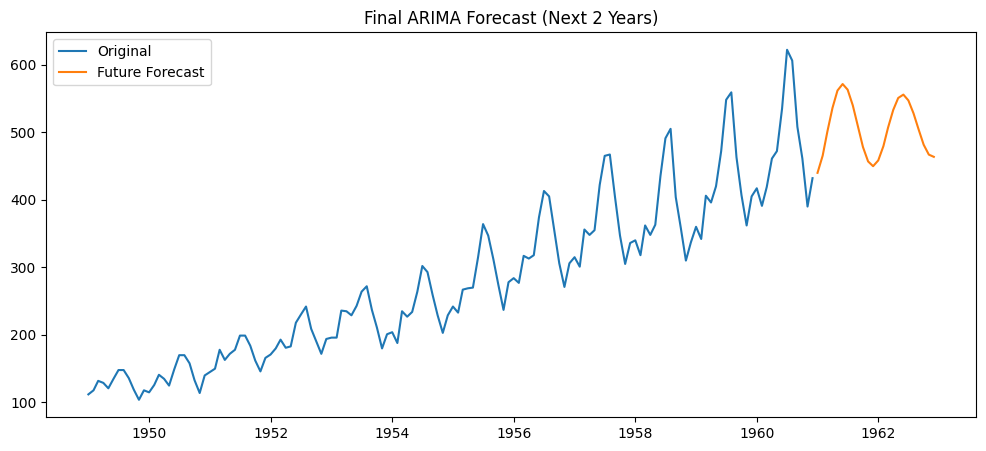

In [12]:
final_model = ARIMA(df['Passengers'], order=(2,1,2))
final_fit = final_model.fit()
future_forecast = final_fit.forecast(steps=24)  # next 2 years

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Passengers'], label="Original")
plt.plot(pd.date_range(df.index[-1], periods=24, freq='M'), future_forecast, label="Future Forecast")
plt.legend()
plt.title("Final ARIMA Forecast (Next 2 Years)")
plt.show()